In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize
import random
plt.rcParams['font.sans-serif'] = ['SimHei']

X = np.array(pd.read_excel('./data3.xlsx', usecols=['厚度mm', '孔隙率（%）', '压缩回弹性率（%）']))
透气性 = pd.read_excel('./data3.xlsx', usecols=['透气性 mm/s'])
过滤效率 = pd.read_excel('./data3.xlsx', usecols=['过滤效率（%）'])
过滤阻力 = pd.read_excel('./data3.xlsx', usecols=['过滤阻力Pa'])

压缩回弹性率 = np.array(pd.read_excel('./data3.xlsx', usecols=['压缩回弹性率（%）']))
孔隙率 = np.array(pd.read_excel('./data3.xlsx', usecols=['孔隙率（%）']))
厚度 = np.array(pd.read_excel('./data3.xlsx', usecols=['厚度mm']))

接收距离 = np.array(pd.read_excel('./data3.xlsx', usecols=['接收距离(cm)']))
热风速度 = np.array(pd.read_excel('./data3.xlsx', usecols=['热风速度(r/min)']))
#print(X[0])
X.shape


(75, 3)

0.7362170349607107
0.7362170349607107
1143.573625857623
-81.30347542796218 [ -98.17705503 -150.95898005  -72.71602681  -53.01380954  -32.46728586
  -22.10334697  -16.11049986  -84.40208586  -16.90374616 -266.18191813]


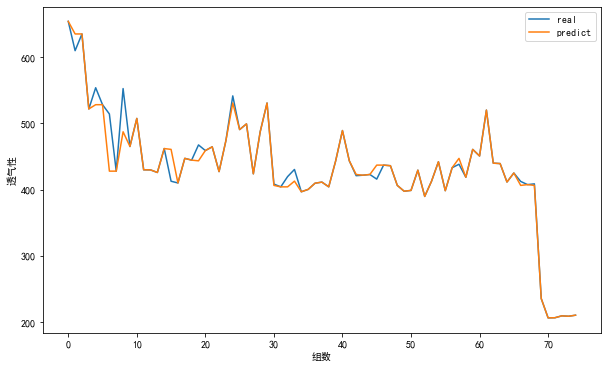

(75, 3)

In [74]:
#决策树-透气性
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X2 = poly.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, 透气性, test_size=0.2)
tree_model = DecisionTreeRegressor(     min_samples_leaf=1,
                                        ccp_alpha=0.0, 
                                        random_state=111)
tree_model.fit(x_train, y_train)
预测透气性 = tree_model.predict(x_test)
print(tree_model.score(x_test, y_test))
print(r2_score(y_test, 预测透气性))          # 回归评价，模型越好：r2→1；模型越差：r2→0
print(mean_squared_error(y_test, 预测透气性))

e=cross_val_score(tree_model,X,透气性,scoring='neg_mean_absolute_error',cv=10)
print(np.mean(e),e)

plt.figure(figsize=(10, 6))
plt.plot(透气性, label='real')
plt.plot(tree_model.predict(X), label='predict')
plt.ylabel('透气性')
plt.xlabel('组数')
plt.legend()
plt.show()
X.shape

In [75]:
import pickle
pickle.dump(tree_model,open('透气性(决策树).sklm','wb'))

(75, 3)
(75, 20)
a (15, 20)
-0.5271850425251838
3731.3434977940146


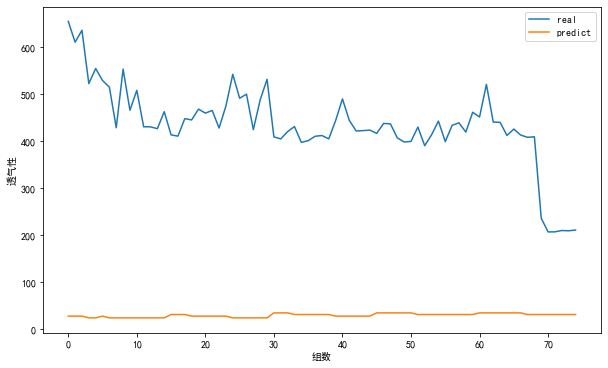

In [216]:
#多项式-透气性
lr = LinearRegression()
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X2 = poly.transform(X)
print(X.shape)
print(X2.shape)
X_train, X_test, y_train, y_test = train_test_split(X2, 透气性, test_size=0.2)
lr.fit(X_train, y_train)
预测透气性 = lr.predict(X_test)
print(r2_score(y_test, 预测透气性))
print(mean_squared_error(y_test, 预测透气性))
plt.figure(figsize=(10, 6))
plt.plot(透气性, label='real')
plt.plot(tree_model.predict(X), label='predict')
plt.ylabel('透气性')
plt.xlabel('组数')
plt.legend()
plt.show()


0.8817899954980051
0.8817899954980051
6.166894431332625


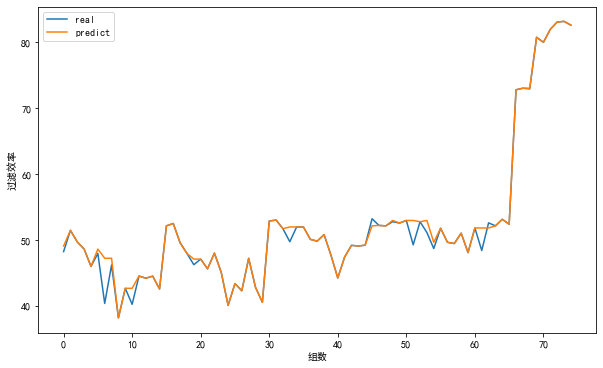

In [106]:
#决策树-过滤效率
x_train, x_test, y_train, y_test = train_test_split(X, 过滤效率, test_size=0.2)
tree_model = DecisionTreeRegressor(     min_samples_leaf=1,
                                        ccp_alpha=0.0, 
                                        random_state=111)
tree_model.fit(x_train, y_train)
预测过滤效率 = tree_model.predict(x_test)
print(tree_model.score(x_test, y_test))
print(r2_score(y_test, 预测过滤效率))          # 回归评价，模型越好：r2→1；模型越差：r2→0
print(mean_squared_error(y_test, 预测过滤效率))
plt.figure(figsize=(10, 6))
plt.plot(过滤效率, label='real')
plt.plot(tree_model.predict(X), label='predict')
plt.ylabel('过滤效率')
plt.xlabel('组数')
plt.legend()
plt.show()

pickle.dump(tree_model,open('过滤效率(决策树).sklm','wb'))

(75, 3)
(75, 10)
0.637784867454979
51.6030313809813


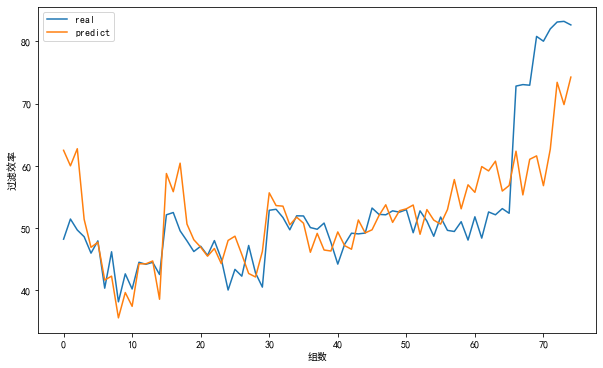

In [169]:
#多项式-过滤效率
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
print(X.shape)
print(X2.shape)
X_train, X_test, y_train, y_test = train_test_split(X2, 过滤效率, test_size=0.2)
lr.fit(X_train, y_train)
预测过滤效率 = lr.predict(X_test)
print(r2_score(y_test, 预测过滤效率))
print(mean_squared_error(y_test, 预测过滤效率))
plt.figure(figsize=(10, 6))
plt.plot(过滤效率, label='real')
plt.plot(lr.predict(X2), label='predict')
plt.ylabel('过滤效率')
plt.xlabel('组数')
plt.legend()
plt.show()

pickle.dump(tree_model,open('过滤效率(多项式).sklm','wb'))

0.7724228844443494
0.7724228844443494
2.5905378965263637


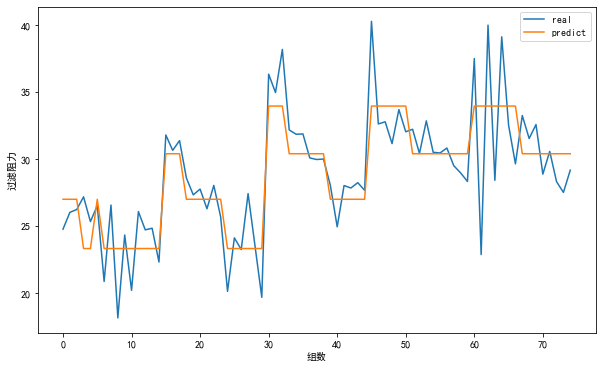

In [212]:
#决策树-过滤阻力
x_train, x_test, y_train, y_test = train_test_split(X, 过滤阻力, test_size=0.1)
tree_model = DecisionTreeRegressor(     min_samples_leaf=15,
                                        ccp_alpha=0.8, 
                                        random_state=111)
tree_model.fit(x_train, y_train)
预测过滤阻力 = tree_model.predict(x_test
)
print(tree_model.score(x_test, y_test))
print(r2_score(y_test, 预测过滤阻力))          # 回归评价，模型越好：r2→1；模型越差：r2→0
print(mean_squared_error(y_test, 预测过滤阻力))

plt.figure(figsize=(10, 6))
plt.plot(过滤阻力, label='real')
plt.plot(tree_model.predict(X), label='predict')
plt.ylabel('过滤阻力')
plt.xlabel('组数')
plt.legend()
plt.show()

pickle.dump(tree_model,open('过滤阻力(决策树).sklm','wb'))

(75, 3)
(75, 20)
0.8373046358867116
1.9273914669099612
参数: [[ 0.00000000e+00 -2.98852843e+03 -6.24744316e+04 -1.69087400e+04
  -9.87316086e+02  8.83792675e+02 -8.52452547e+02  4.23652220e+02
   4.82239544e+02 -5.82741513e+01  4.95162001e+00  1.46828338e+01
  -5.51299107e+00 -9.12950257e+00  9.21545460e+00 -4.43643254e-02
  -5.05813840e-01 -2.96049960e+00  3.55703488e-01  9.11350606e-02]] [2480227.26711498]


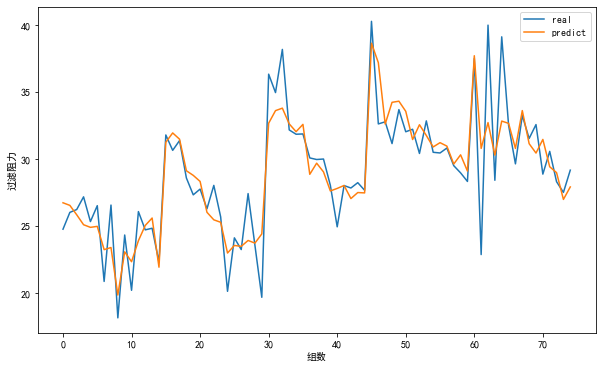

In [203]:
#多项式-过滤阻力
lr = LinearRegression()
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X2 = poly.transform(X)
print(X.shape)
print(X2.shape)
X_train, X_test, y_train, y_test = train_test_split(X2, 过滤阻力, test_size=0.1)
lr.fit(X_train, y_train)
预测过滤阻力 = lr.predict(X_test)

print(r2_score(y_test, 预测过滤阻力))       # 回归评价，模型越好：r2→1；模型越差：r2→0
print(mean_squared_error(y_test, 预测过滤阻力))
print('参数:', lr.coef_, lr.intercept_)

plt.figure(figsize=(10, 6))
plt.plot(过滤阻力, label='real')
plt.plot(lr.predict(X2), label='predict')
plt.ylabel('过滤阻力')
plt.xlabel('组数')
plt.legend()
plt.show()

pickle.dump(tree_model,open('过滤阻力(多项式).sklm','wb'))


In [ ]:
X = np.array(pd.read_excel('./data3.xlsx', usecols=['厚度mm', '孔隙率（%）', '压缩回弹性率（%）', '过滤阻力Pa', '接收距离(cm)', '热风速度(r/min)', '透气性 mm/s']))
lr = LinearRegression()
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
print(X.shape)
print(X2.shape)
X_train, X_test, y_train, y_test = train_test_split(X2, 过滤效率, test_size=0.2)
lr.fit(X_train, y_train)
预测过滤效率 = lr.predict(X_test)
print(r2_score(y_test, 预测过滤效率))       # 回归评价，模型越好：r2→1；模型越差：r2→0
print(mean_squared_error(y_test, 预测过滤效率))
print('参数:', lr.coef_, lr.intercept_)
plt.figure(figsize=(10, 6))
plt.plot(过滤效率, label='real')
plt.plot(lr.predict(X2), label='predict')
plt.ylabel('过滤效率')
plt.xlabel('组数')
plt.legend()
plt.show()




In [77]:
X2[[0],:].shape

(1, 36)

In [137]:
def fun(x):
    return lr.predict(x)
x0 = X2[[0],:]
print(x0.shape)
fun(x0)
# 最优解 = minimize(fun, x0.reshape(-1, 1), method='BFGS')
# print(最优解)
# lr.predict(X2[[0],:])

(1, 10)


array([[48.69196174]])

In [ ]:
X = np.array(pd.read_excel('./data3.xlsx', usecols=['接收距离(cm)', '热风速度(r/min)']))
lr = LinearRegression()
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X2 = poly.transform(X)
print(X.shape)
print(X2.shape)
X_train, X_test, y_train, y_test = train_test_split(X2, 过滤效率, test_size=0.2)
lr.fit(X_train, y_train)
预测过滤效率 = lr.predict(X_test)
print(r2_score(y_test, 预测过滤效率))       # 回归评价，模型越好：r2→1；模型越差：r2→0
print(mean_squared_error(y_test, 预测过滤效率))
print('参数:', lr.coef_, lr.intercept_)
plt.figure(figsize=(10, 6))
plt.plot(过滤效率, label='real')
plt.plot(lr.predict(X2), label='predict')
plt.ylabel('过滤效率')
plt.xlabel('组数')
plt.legend()
plt.show()


In [ ]:
import pickle
pickle.dump(lr,open('lr.sklm','wb'))



In [366]:
from sko.GA import GA
最佳过滤效率 = 53.1191420953126
最优解 = []

X = np.array(pd.read_excel('./data3.xlsx', usecols=['接收距离(cm)', '热风速度(r/min)']))

lr1=pickle.load(open('厚度.sklm','rb'))
lr2=pickle.load(open('孔隙率.sklm','rb'))
lr3=pickle.load(open('压缩回弹性率.sklm','rb'))

X = np.array([lr1(X),lr2(X),lr3(X)]).T
print('X.shape',X.shape)

lr = LinearRegression()
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X2 = poly.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X2, 过滤效率, test_size=0.2)  #分割数据集
lr.fit(X_train, y_train)
预测过滤效率 = lr.predict(X_test)
print(r2_score(y_test, 预测过滤效率))
print(mean_squared_error(y_test, 预测过滤效率))
# # plt.figure(figsize=(10, 6))
# plt.plot(过滤效率, label='real')
# plt.plot(lr.predict(X2), label='predict')
# plt.ylabel('过滤效率')
# plt.xlabel('组数')
# plt.legend()
# plt.show()

a = np.array([[1, 1]])

#求最佳过滤效率
def func1(x):    #根据工艺参数得到结构变量
    return np.array([lr1(x), lr2(x), lr3(x)]).T
func1(a).shape

for i in range(10, 40, 1):
    for j in range(800, 1500, 1):
        结构变量 = func1(np.array([[i, j]]))
        tmp = lr.predict(poly.transform(结构变量))
        if tmp>最佳过滤效率:
            最佳过滤效率 = tmp
            最优解 = [i, j]
print(最佳过滤效率,最优解)



# ga = GA(func=, n_dim=2, size_pop=50, max_iter=20, prob_mut=0.001)
# best_x, best_y = ga.run()
# print('best_x:', best_x, '\n', 'best_y:', best_y)



c:\Users\Mercury\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Mercury\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


X.shape (75, 3)
0.262994298543179
37.38573243665185
[[87.59435079]] [24, 1049]


[[52.04374512]] [12.078187244498103, 1659.621955374553]


c:\Users\Mercury\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Mercury\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


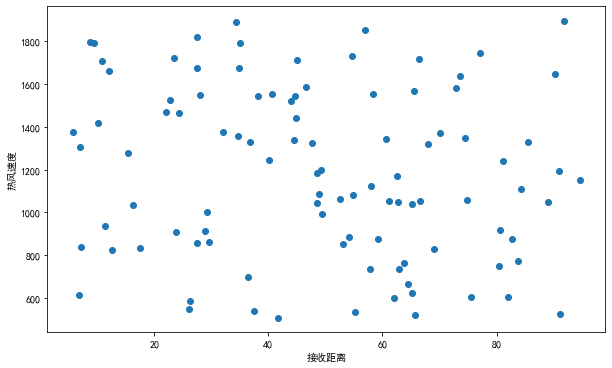

In [261]:
最佳过滤效率 = 53.1191420953126
最优解 = []
x = []
y = []
for i in range(100):
    x.append(random.random()*95+5)
for i in range(100):
    y.append(random.random()*1400+500)
plt.figure(figsize=(10, 6))
plt.scatter(x,y)
plt.ylabel('热风速度')
plt.xlabel('接收距离')

lr=pickle.load(open('lr.sklm','rb'))

for i in range(100):
    tmp = poly.transform(np.array([[x[i], y[i]]]))
    res = lr.predict(tmp)
    if res>最佳过滤效率:
        res = 最佳过滤效率
        最优解 = [x[i], y[i]]
print(res, 最优解)

lr1=pickle.load(open('厚度.sklm','rb'))
lr2=pickle.load(open('孔隙率.sklm','rb'))
lr3=pickle.load(open('压缩回弹性率.sklm','rb'))

In [266]:
#结构变量之间
X = np.array(pd.read_excel('./data3.xlsx', usecols=['厚度mm', '孔隙率（%）', '压缩回弹性率（%）']))

array([1.83905])

0.6967721419340294
0.4242049527792675


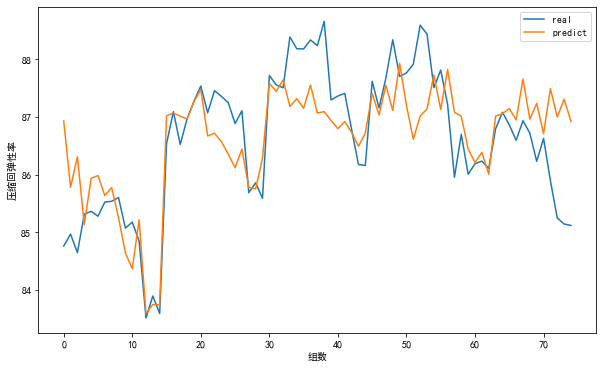

[[-2.28412239e+02 -1.66612884e+02  1.48019204e+01  6.49073407e+00
   8.82990554e+01 -2.54688481e+01  5.06816131e+01  1.56659931e+02
   2.22744466e+03 -6.08404831e+02  3.08027702e+02  1.49922726e+03
  -4.96761809e+01 -7.11924058e+01  1.48680153e+01 -2.89299934e+03
   3.78133677e+02 -4.98295422e+01  1.36573224e+00  7.55112133e-01
  -1.29113538e-01 -1.70762219e+01  3.22721537e+01 -4.05894751e+00
   3.56779181e-01 -8.95592508e-03 -2.66101943e-03  3.89209782e-04]] [23809825.73231677]


In [75]:
X = np.array(pd.read_excel('./data3.xlsx', usecols=['厚度mm', '孔隙率（%）']))
lr = LinearRegression()
poly = PolynomialFeatures(degree=6)
poly.fit(X)
X2 = poly.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X2, 压缩回弹性率, test_size=0.2)
lr.fit(X_train, y_train)
预测压缩回弹性率 = lr.predict(X_test)
print(r2_score(y_test, 预测压缩回弹性率))
print(mean_squared_error(y_test, 预测压缩回弹性率))
plt.figure(figsize=(10, 6))
plt.plot(压缩回弹性率, label='real')
plt.plot(lr.predict(X2), label='predict')
plt.ylabel('压缩回弹性率')
plt.xlabel('组数')
plt.legend()
plt.show()
print(lr.coef_, lr.intercept_)

0.9360504525805815
5.792997250267281


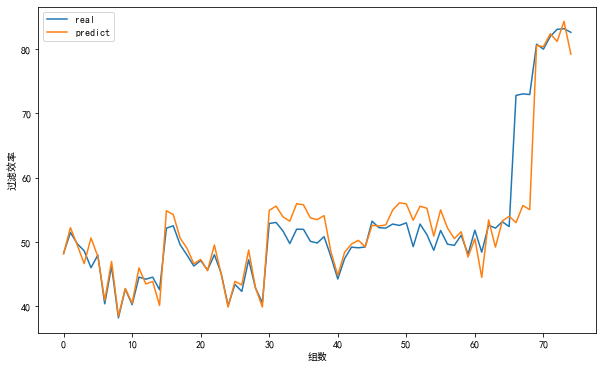

[[ 6.88409086e-05  1.08279422e-04 -6.37598142e-06  1.26204927e-05
   6.40053665e-05 -5.90747229e-04 -7.18257996e-05  1.71005572e-03
  -1.57242583e-03  4.84593137e-05 -8.09755619e-03  1.64686077e-03
  -6.51245082e-05  5.45026988e-06 -1.70331143e-07  2.92504190e-04
  -4.48331187e-05 -1.07067190e-07  9.93052974e-08 -7.59050255e-09
   2.29410375e-10 -1.06927292e-06 -3.47200237e-07  1.16251015e-07
  -8.71694235e-09  2.85935147e-10 -2.72618085e-12 -6.18201914e-14]] [322.28487536]


In [80]:
X = np.array(pd.read_excel('./data3.xlsx', usecols=['过滤阻力Pa', '透气性 mm/s']))
lr = LinearRegression()
poly = PolynomialFeatures(degree=6)
poly.fit(X)
X2 = poly.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X2, 过滤效率, test_size=0.2)
lr.fit(X_train, y_train)
预测过滤效率 = lr.predict(X_test)
print(r2_score(y_test, 预测过滤效率))
print(mean_squared_error(y_test, 预测过滤效率))
plt.figure(figsize=(10, 6))
plt.plot(过滤效率, label='real')
plt.plot(lr.predict(X2), label='predict')
plt.ylabel('过滤效率')
plt.xlabel('组数')
plt.legend()
plt.show()
print(lr.coef_, lr.intercept_)